Tasks in this notebook:  
* Importing datasets for data cleaning.  
* Saving the clean datasets to work with them later.

In [1]:
#Importing  libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing datasets
data_co2 = pd.read_csv('/Users/anna/data/climate-change/datasets/carbondioxide.csv')
data_temp = pd.read_csv('/Users/anna/data/climate-change/datasets/GlobalTemperatures.csv')
data_sea = pd.read_csv('/Users/anna/data/climate-change/datasets/seaice.csv')

## Carbon dioxide

First of all, we have a look at the data to see the information we have and its main characteristics.

In [3]:
data_co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [4]:
test = data_co2[['Decimal Date', 'Carbon Dioxide (ppm)',
       'Seasonally Adjusted CO2 (ppm)', 'Carbon Dioxide Fit (ppm)',
       'Seasonally Adjusted CO2 Fit (ppm)']]

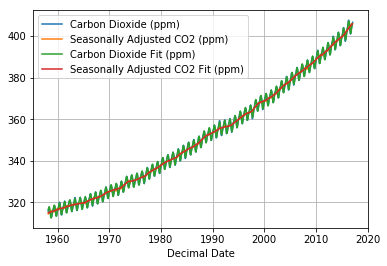

In [5]:
test.plot(x='Decimal Date', grid=True)

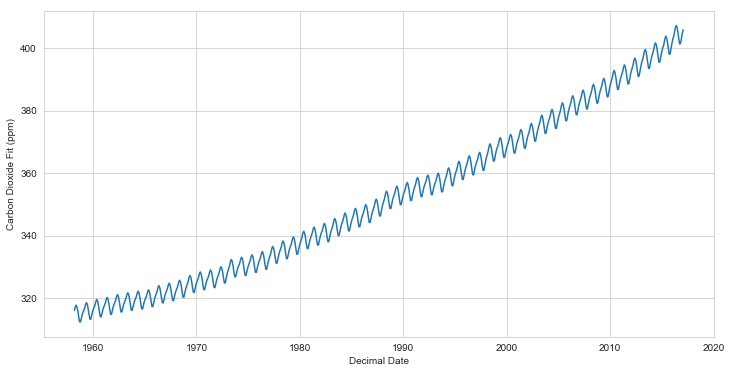

In [6]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.lineplot(x='Decimal Date', y='Carbon Dioxide Fit (ppm)', data=data_co2)

In [7]:
data_co2.dtypes

Year                                   int64
Month                                  int64
Decimal Date                         float64
Carbon Dioxide (ppm)                 float64
Seasonally Adjusted CO2 (ppm)        float64
Carbon Dioxide Fit (ppm)             float64
Seasonally Adjusted CO2 Fit (ppm)    float64
dtype: object

In [8]:
data_co2.isna().sum()

Year                                  0
Month                                 0
Decimal Date                          0
Carbon Dioxide (ppm)                 17
Seasonally Adjusted CO2 (ppm)        17
Carbon Dioxide Fit (ppm)             13
Seasonally Adjusted CO2 Fit (ppm)    13
dtype: int64

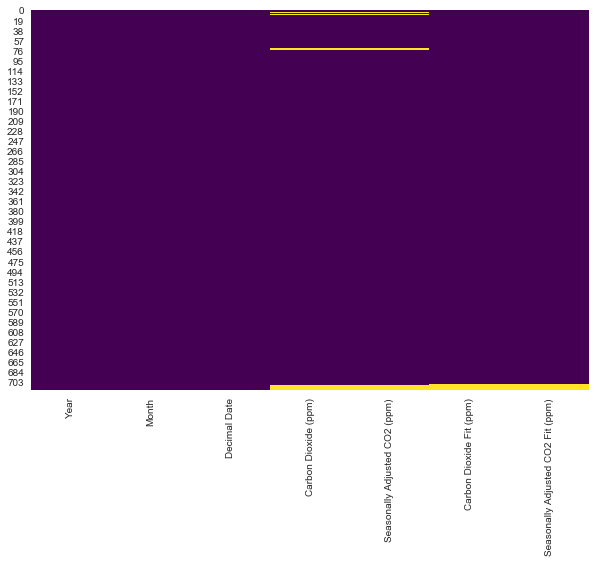

In [9]:
# Visualizing number of NaNs per columns
plt.figure(figsize=(10,7))
sns.heatmap(data_co2.isnull(), cbar = False, cmap='viridis')

In [10]:
data_co2.shape

(720, 7)

The **types** of the columns of Year and Month are integer, maybe it would be better if they were datetime.  
We have a few **null values**, and since they are not a lot (less than 20 out of 720) we will drop them. We could extrapolate but wr don't to bias in any way the data.

In [11]:
# Renaming the fifth column since it is the one that we will use more
data_co2.rename(columns={'Seasonally Adjusted CO2 Fit (ppm)':'CO2'}, inplace=True)

In [12]:
data_co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),CO2
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [13]:
#Dropping NaNs
data_co2 = data_co2.dropna().reset_index(drop=True)
data_co2.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),CO2
0,1958,3,1958.2027,315.69,314.42,316.18,314.89
1,1958,4,1958.2877,317.45,315.15,317.30,314.98
2,1958,5,1958.3699,317.50,314.73,317.83,315.06
3,1958,7,1958.5370,315.86,315.17,315.87,315.21
4,1958,8,1958.6219,314.93,316.17,314.01,315.29


In [14]:
#data_co2.drop('Decimal Date', axis=1, inplace=True)
#data_co2.head()

In [15]:
# Changing type of year and month to datetime64
data_co2['Year'] = pd.to_datetime(data_co2['Year'])
data_co2['Month'] = pd.to_datetime(data_co2['Month'])
data_co2.dtypes

Year                             datetime64[ns]
Month                            datetime64[ns]
Decimal Date                            float64
Carbon Dioxide (ppm)                    float64
Seasonally Adjusted CO2 (ppm)           float64
Carbon Dioxide Fit (ppm)                float64
CO2                                     float64
dtype: object

## Saving clean dataset

In [16]:
data_co2.to_csv('/Users/anna/data/climate-change/datasets/clean_co2.csv', index=False)

## Temperature

Repeating the process of checking the information of the dataset, types of columns and NaNs.

In [17]:
data_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_temp.shape

(3192, 9)

In [19]:
# Selecting columns we need and renaming
temp = data_temp.rename(columns = {'dt':'Year', 'LandAndOceanAverageTemperature':'AvgTemp'})
temp = temp[['Year', 'AvgTemp']]
temp.head()

,Year,AvgTemp
0,1750-01-01,NaN
1,1750-02-01,NaN
2,1750-03-01,NaN
3,1750-04-01,NaN
4,1750-05-01,NaN


In [20]:
# Fixing type of date column
temp.Year = pd.to_datetime(temp.Year)

In [22]:
#Dropping NaNs
temp = temp.dropna().reset_index(drop=True)
temp.head()

,Year,AvgTemp
0,1850-01-01,12.833
1,1850-02-01,13.588
2,1850-03-01,14.043
3,1850-04-01,14.667
4,1850-05-01,15.507


In [23]:
temp.isna().sum()

Year       0
AvgTemp    0
dtype: int64

In [24]:
#Saving clean dataset
temp.to_csv('/Users/anna/data/climate-change/datasets/clean_temp.csv', index=False)

## Sea ice

Repeating the process of checking the information of the dataset, types of columns and NaNs.

In [25]:
data_sea.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsidc...,north


In [26]:
data_sea.shape

(24908, 7)

In [27]:
# Dropping columns we don't want
data_sea.drop(['Source Data', 'Missing'], axis=1, inplace=True) 

In [28]:
data_sea.dtypes

Year            int64
Month           int64
Day             int64
Extent        float64
hemisphere     object
dtype: object

Year and Month columns should be datetime.

In [29]:
data_sea.head()

,Year,Month,Day,Extent,hemisphere
0,1978,10,26,10.231,north
1,1978,10,28,10.420,north
2,1978,10,30,10.557,north
3,1978,11,1,10.670,north
4,1978,11,3,10.777,north


In [30]:
data_sea.isna().sum()

Year          0
Month         0
Day           0
Extent        0
hemisphere    0
dtype: int64

No null values found in the dataset.

In [31]:
#Saving clean dataset
data_sea.to_csv('/Users/anna/data/climate-change/datasets/clean_ice.csv', index=False)